In [1]:
import matlab.engine
import matplotlib.pyplot as plt
import numpy as np
import json


In [10]:
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.25_modezero_coding.json', 'r') as f:
    result_dict = json.load(f)
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.2_modezero.json', 'r') as f:
    result_dict1 = json.load(f)

print(result_dict)

{'test_acc': [0.32310756972111554, 0.500597609561753, 0.5065737051792829, 0.5625498007968127, 0.5818725099601594, 0.6472111553784861, 0.6665338645418327, 0.6719123505976096, 0.6681274900398406, 0.6774900398406375, 0.6667330677290837, 0.6655378486055777, 0.6633466135458167, 0.6613545816733067, 0.6752988047808764, 0.6643426294820717, 0.6699203187250996, 0.6810756972111554, 0.6719123505976096, 0.6830677290836653, 0.6878486055776892, 0.6802788844621513, 0.6758964143426295, 0.6780876494023904, 0.6806772908366534, 0.6800796812749004, 0.6788844621513944, 0.6878486055776892, 0.6810756972111554, 0.6764940239043825, 0.6758964143426295, 0.6868525896414343, 0.6792828685258964, 0.6778884462151394, 0.6872509960159362, 0.6752988047808764, 0.6782868525896414], 'test_loss': [0.07026540628884423, 0.05143414960520055, 0.054949263664341094, 0.042630262268768995, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [128]:
len(result_dict["test_acc"])

42

In [139]:
max_value = max(result_dict['test_acc'])
max_index = result_dict['test_acc'].index(max_value)

print(f'Max value: {max_value}')
print(f'Index of max value: {max_index}')

Max value: 0.7282868525896414
Index of max value: 34


In [145]:
print(f"Average: {np.mean(result_dict['test_acc'][5:])*100}")
print(f"Std: {np.std(result_dict['test_acc'][5:])*100}")

Average: 69.04382470119522
Std: 2.5464480241914083


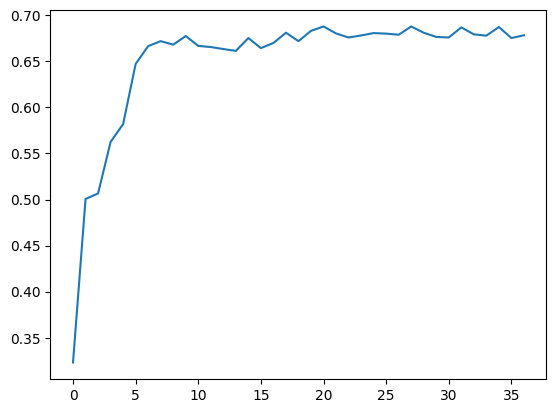

In [11]:
# Plot the accuracy
plt.plot(result_dict['test_acc'][:50])
# plt.plot(result_dict1['test_acc'][:50])

In [ ]:
eng = matlab.engine.start_matlab()

In [56]:
l2e1b10 = np.load('figure_data/l5e1b10.npz')
l2e1b1024 = np.load('figure_data/l5e1b1024.npz')

In [57]:
coding_mse = np.mean(l2e1b10['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b10['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data1_matlab = matlab.double(coding_mse.tolist())
average_data2_matlab = matlab.double(base_mse.tolist())
x_axis = matlab.double(list(range(1, len(coding_mse) + 1)))

coding_mse = np.mean(l2e1b1024['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b1024['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data3_matlab = matlab.double(coding_mse.tolist())
average_data4_matlab = matlab.double(base_mse.tolist())

# Plot the data in MATLAB
eng.figure(1.0,nargout=0)
eng.plot(x_axis, average_data1_matlab, 'r-', nargout=0)

eng.hold('on', nargout=0)
eng.plot(x_axis, average_data3_matlab, 'b-', nargout=0)
eng.plot(x_axis, average_data2_matlab, 'g-', nargout=0)
eng.plot(x_axis, average_data4_matlab, 'm-', nargout=0)




eng.hold('off', nargout=0)

font_size = 14
eng.legend(['FedAvg-FERP, B=10', 'FedAvg-FERP, B=1024', 'FedAvg, B=10', 'FedAvg, B=1024'], 'FontSize', 10, nargout=0)
eng.xlabel('Communication Rounds', 'FontSize', font_size)
eng.ylabel('MSE', 'FontSize', font_size)
# eng.title('loss=5%, E=5, B=1024')
eng.grid('on', nargout=0)

# Use drawnow to ensure the figure appears
eng.drawnow(nargout=0)

## Average val mse after 150 round

In [49]:
tmp_data = np.load('figure_data/l2e1b10.npz')
average_coding_mse = np.nanmean(tmp_data['coding_mse'][:,150:1000])
average_coding_val_mse = np.nanmean(tmp_data['coding_val_mse'][:,150:1000])
average_base_mse = np.nanmean(tmp_data['base_mse'][:,150:1000])
average_base_val_mse = np.nanmean(tmp_data['base_val_mse'][:,150:1000])

print(f'coding_mse: {average_coding_mse}')
print(f'coding_val_mse: {average_coding_val_mse}')
print(f'base_mse: {average_base_mse}')
print(f'base_val_mse: {average_base_val_mse}')

coding_mse: 323.1957190614588
coding_val_mse: 447.0334008115881
base_mse: 959.6834428764791
base_val_mse: 944.0132116205552
